In [0]:
from google.colab import files
files.upload()

Saving reviews.csv to reviews.csv


In [0]:
import pandas as pd

In [0]:
!ls

In [0]:
df = pd.read_csv('reviews.csv')

In [0]:
df.tail()


,label,text
46496,-1,Американцы по натуре же своей лентяи живущие в...
46497,-1,И вновь Дэвид собрал свою любимую компашку акт...
46498,-1,Это провал Именно с этих строк хотелось бы нач...
46499,-1,Один из главных фильмов прошлого года Афера по...
46500,-1,Впечатления в двух словах после просмотра редк...


## Baseline

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [0]:
vec = CountVectorizer()
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)

In [0]:
nb = MultinomialNB()
clf = nb.fit(X_train, y_train)

In [0]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.74      0.23      0.35      1085
           0       0.35      0.09      0.14      1372
           1       0.82      0.98      0.90      9169

    accuracy                           0.81     11626
   macro avg       0.64      0.43      0.46     11626
weighted avg       0.76      0.81      0.76     11626



### Препроцессинг



In [0]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
noise_with_punct = stopwords.words('russian')+ list(punctuation)

In [0]:
noise = stopwords.words('russian')

In [0]:
vec = CountVectorizer(tokenizer=word_tokenize, stop_words= noise)
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)
nb = MultinomialNB()
clf = nb.fit(X_train, y_train)

In [0]:
print(classification_report(y_test, clf.predict(X_test))) #без включения пунктуации в стоп слова

              precision    recall  f1-score   support

          -1       0.69      0.20      0.31      1072
           0       0.38      0.07      0.11      1453
           1       0.81      0.99      0.89      9101

    accuracy                           0.80     11626
   macro avg       0.63      0.42      0.44     11626
weighted avg       0.75      0.80      0.74     11626



In [0]:
vec = CountVectorizer(tokenizer=word_tokenize, stop_words=noise_with_punct)
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)
nb = MultinomialNB()
clf = nb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
print(classification_report(y_test, clf.predict(X_test))) #с включением пунктуации в стоп-слова

              precision    recall  f1-score   support

          -1       0.73      0.19      0.31      1116
           0       0.32      0.06      0.10      1407
           1       0.81      0.98      0.89      9103

    accuracy                           0.80     11626
   macro avg       0.62      0.41      0.43     11626
weighted avg       0.74      0.80      0.74     11626



Разницы почти нет. Оба варианта дают посредственный результат.

### Pymorphy.


In [0]:
!pip -qq install rusenttokenize --progress-bar off

In [0]:
! pip install pymorphy2

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 7.1MB 6.5MB/s 


In [0]:
import pymorphy2

In [0]:
from rusenttokenize import ru_sent_tokenize
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()
import string

In [0]:
morph_analyzer = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

In [0]:
def preprocess_tokenize(text):
    
    text_preprocessed_tokenized = []
        
    for sentence in ru_sent_tokenize(text):
        clean_words = [word.strip(string.punctuation) for word in word_tokenize(text)]
        clean_words = [word for word in clean_words if word]
        clean_words = [word.lower() for word in clean_words if word]
        clean_words = [word for word in clean_words if word not in russian_stopwords]
        clean_lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_words]
        text_preprocessed_tokenized.extend(clean_lemmas)

    return text_preprocessed_tokenized

In [0]:
vec = CountVectorizer(tokenizer=preprocess_tokenize)
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)
nb = MultinomialNB()
clf = nb.fit(X_train, y_train)

In [0]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.60      0.46      0.52      1067
           0       0.35      0.19      0.25      1438
           1       0.86      0.95      0.90      9121

    accuracy                           0.81     11626
   macro avg       0.61      0.53      0.56     11626
weighted avg       0.78      0.81      0.79     11626



## LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
vec = CountVectorizer(tokenizer=preprocess_tokenize)
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)
lr = LogisticRegression()
clf = lr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.60      0.57      0.59      1080
           0       0.33      0.29      0.31      1446
           1       0.89      0.92      0.90      9100

    accuracy                           0.80     11626
   macro avg       0.61      0.59      0.60     11626
weighted avg       0.79      0.80      0.80     11626



In [0]:
vec = CountVectorizer(ngram_range=(2, 2)) #попроуем биграммы
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)
lr = LogisticRegression()
clf = lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
print(classification_report(y_test, clf.predict(X_test))) 

              precision    recall  f1-score   support

          -1       0.71      0.35      0.47      1112
           0       0.43      0.11      0.18      1395
           1       0.84      0.98      0.91      9119

    accuracy                           0.82     11626
   macro avg       0.66      0.48      0.52     11626
weighted avg       0.78      0.82      0.78     11626



In [0]:
vec = CountVectorizer(ngram_range=(2, 2),tokenizer=preprocess_tokenize) #биграммы с токенизатором
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)
lr = LogisticRegression()
clf = lr.fit(X_train, y_train)

In [0]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.69      0.22      0.33      1073
           0       0.52      0.06      0.11      1477
           1       0.81      0.99      0.89      9076

    accuracy                           0.80     11626
   macro avg       0.67      0.42      0.45     11626
weighted avg       0.76      0.80      0.74     11626




# Подбор параметров

In [0]:
vectorizer = CountVectorizer(tokenizer=preprocess_tokenize)
bow = vectorizer.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bow, df.label)
lr = LogisticRegression(C=5, penalty='l2', random_state=42,  solver = 'newton-cg' )
clf = lr.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.60      0.53      0.56      1094
           0       0.30      0.28      0.29      1428
           1       0.89      0.91      0.90      9104

    accuracy                           0.80     11626
   macro avg       0.60      0.57      0.58     11626
weighted avg       0.79      0.80      0.79     11626



попробуем немного поменять параметры

In [0]:
vectorizer = CountVectorizer(tokenizer=preprocess_tokenize)
bow = vectorizer.fit_transform(df.text)
bow = vectorizer.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bow, df.label)
lr = LogisticRegression(C=7, penalty='l1', random_state=10,  solver = 'saga' )
clf = lr.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

ERROR! Session/line number was not unique in database. History logging moved to new session 61
              precision    recall  f1-score   support

          -1       0.65      0.57      0.61      1105
           0       0.41      0.25      0.31      1435
           1       0.89      0.95      0.92      9086

    accuracy                           0.83     11626
   macro avg       0.65      0.59      0.61     11626
weighted avg       0.80      0.83      0.81     11626



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
new_vector = vectorizer.transform(['Офигенный фильм! посмотрю еще раз!!!', 
                                   'Очень скучно. Какой-то заезженный сценарий',
                                   'Полный отстой. Зря деньги потратил.'])


In [0]:
clf.predict(new_vector)

array([ 1, -1, -1])


# Confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(y_test, clf.predict(X_test))

array([[ 632,  198,  275],
       [ 234,  361,  840],
       [ 106,  325, 8655]])

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
clf.classes_

array([-1,  0,  1])

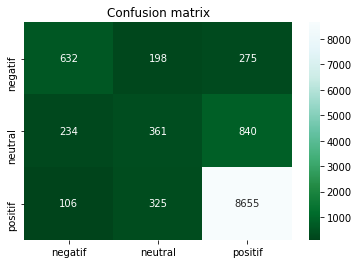

In [0]:
categories = [ "negatif", "neutral", "positif"]
sns.heatmap(data=confusion_matrix(y_test, clf.predict(X_test)), 
            annot=True, fmt="d", cbar=True, xticklabels=categories, 
            yticklabels=categories, cmap="BuGn_r")
plt.title("Confusion matrix")
plt.show()